In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [ ]:
digits = datasets.load_digits()

In [ ]:
print(digits.keys())
print(digits.DESCR)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are di

In [ ]:
print(digits.images.shape)
print(digits.data.shape)

(1797, 8, 8)
(1797, 64)


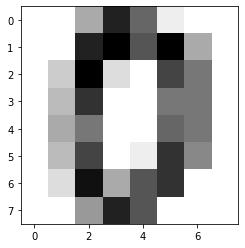

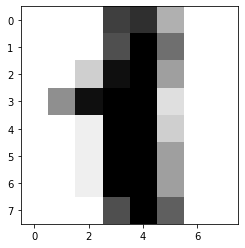

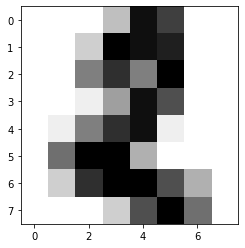

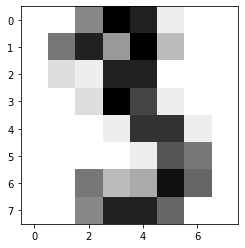

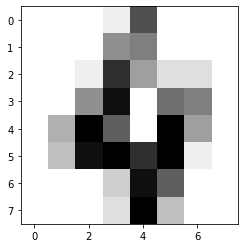

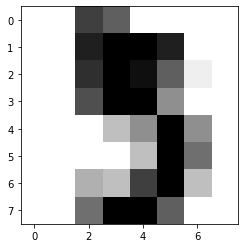

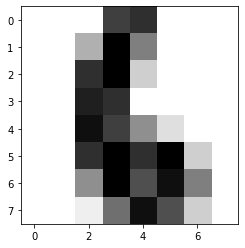

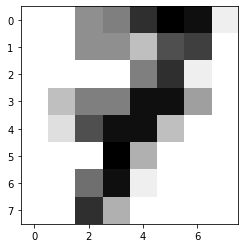

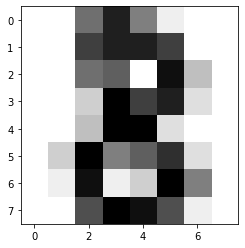

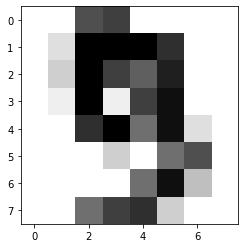

In [ ]:
for i in range(10):
    plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

In [ ]:
X = digits.images
y = digits.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42, stratify=y)

In [ ]:
X_train.shape

(1437, 8, 8)

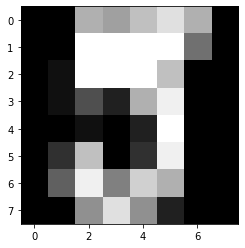

In [ ]:
plt.gray()
plt.imshow(X_train[0])

In [ ]:
y_train[0]

5

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
model_mlp = Sequential([
   Dense(1024, activation='relu', input_shape=(64,)),
   Dense(128, activation='tanh'),
   Dropout(rate=0.4),
   Dense(64, activation='relu'),
   Dense(10, activation='softmax')
])
model_mlp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1024)              66560     
                                                                 
 dense_5 (Dense)             (None, 128)               131200    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 206,666
Trainable params: 206,666
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
X_train.shape

(1437, 8, 8)

In [ ]:
X_train_mlp = X_train.reshape(1437, 8*8)
X_train_mlp.shape

(1437, 64)

In [ ]:
type(X_train_mlp[0][50])

numpy.float64

In [ ]:
X_train_mlp[0][50]

15.0

In [ ]:
X_train_mlp = X_train_mlp.astype('float32') / 255

In [ ]:
type(X_train_mlp[0][50])

numpy.float32

In [ ]:
X_train_mlp[0][50]

0.05882353

In [ ]:
15.0/255

0.058823529411764705

In [ ]:
X_test.shape

(360, 8, 8)

In [ ]:
y_test.shape

(360,)

In [ ]:
X_test_mlp = X_test.reshape(360,8*8)
X_test_mlp = X_test_mlp.astype('float32') / 255

In [ ]:
X_test_mlp.shape

(360, 64)

In [ ]:
y_train[0]

5

In [ ]:
from keras.utils import to_categorical
y_train_mlp = to_categorical(y_train)

In [ ]:
y_train_mlp[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_test_mlp = to_categorical(y_test)

In [ ]:
history= model_mlp.fit(X_train_mlp, y_train_mlp,validation_data=(X_test_mlp,y_test_mlp),epochs = 100, batch_size = 64, shuffle=True)

Epoch 1/100
23/23 [==============================] - 1s 14ms/step - loss: 2.2131 - accuracy: 0.2679 - val_loss: 2.0190 - val_accuracy: 0.3333
Epoch 2/100
23/23 [==============================] - 0s 8ms/step - loss: 1.7022 - accuracy: 0.6360 - val_loss: 1.1859 - val_accuracy: 0.8222
Epoch 3/100
23/23 [==============================] - 0s 9ms/step - loss: 0.9210 - accuracy: 0.7898 - val_loss: 0.6126 - val_accuracy: 0.8306
Epoch 4/100
23/23 [==============================] - 0s 7ms/step - loss: 0.5635 - accuracy: 0.8379 - val_loss: 0.4263 - val_accuracy: 0.8611
Epoch 5/100
23/23 [==============================] - 0s 8ms/step - loss: 0.4072 - accuracy: 0.8852 - val_loss: 0.3210 - val_accuracy: 0.9083
Epoch 6/100
23/23 [==============================] - 0s 8ms/step - loss: 0.3189 - accuracy: 0.9137 - val_loss: 0.2638 - val_accuracy: 0.9139
Epoch 7/100
23/23 [==============================] - 0s 9ms/step - loss: 0.2547 - accuracy: 0.9276 - val_loss: 0.2422 - val_accuracy: 0.9194
Epoch 8/100


In [ ]:
test_loss_mlp, test_acc_mlp = model_mlp.evaluate(X_test_mlp, y_test_mlp)

12/12 [==============================] - 0s 2ms/step - loss: 0.0607 - accuracy: 0.9806


In [ ]:
print('test accuracy:', (test_acc_mlp*100))

test accuracy: 98.0555534362793


In [ ]:
predictions=model_mlp.predict(X_test_mlp[0:100])

4/4 [==============================] - 0s 3ms/step


In [ ]:
predictions[0]

array([3.7901719e-07, 5.4541985e-15, 4.9757180e-15, 3.8419010e-08,
       5.7143090e-10, 9.9999744e-01, 1.9384936e-06, 3.0734212e-10,
       2.5152493e-08, 2.5177320e-07], dtype=float32)

In [ ]:
np.argmax(predictions[0])

5

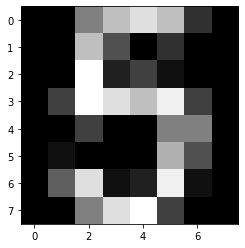

In [ ]:
plt.imshow(X_test_mlp[0].reshape(8,8))

In [ ]:
np.argmax(predictions,axis=1)

array([5, 2, 8, 8, 7, 2, 6, 2, 6, 5, 0, 5, 9, 3, 4, 4, 2, 4, 9, 9, 6, 3,
       8, 1, 2, 5, 6, 0, 3, 4, 6, 7, 2, 6, 6, 6, 6, 5, 0, 9, 1, 7, 9, 6,
       5, 7, 5, 2, 7, 5, 0, 1, 5, 5, 3, 2, 4, 0, 0, 2, 7, 5, 6, 1, 3, 7,
       6, 5, 7, 0, 9, 0, 3, 8, 2, 5, 8, 2, 3, 5, 9, 3, 2, 7, 9, 6, 8, 1,
       0, 1, 2, 9, 4, 7, 1, 2, 7, 8, 4, 2])

In [ ]:
y_test[0:100]

array([5, 2, 8, 1, 7, 2, 6, 2, 6, 5, 0, 5, 9, 3, 4, 4, 2, 4, 9, 9, 6, 3,
       8, 1, 2, 5, 6, 0, 3, 4, 6, 7, 2, 6, 6, 6, 6, 5, 0, 9, 1, 7, 9, 6,
       5, 7, 5, 2, 7, 5, 0, 8, 5, 5, 3, 2, 4, 0, 0, 2, 7, 5, 6, 1, 3, 7,
       6, 5, 7, 0, 9, 0, 3, 8, 2, 5, 8, 2, 3, 5, 9, 3, 2, 7, 9, 6, 8, 1,
       0, 1, 2, 9, 4, 9, 1, 2, 7, 8, 4, 2])

In [ ]:
np.argmax(predictions,axis=1) ==y_test[0:100]

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True])

In [ ]:
np.mean(np.argmax(predictions,axis=1) ==y_test[0:100])

0.97

In [ ]:
wrong = np.argmin(np.argmax(predictions,axis=1) == y_test[0:100])
print(wrong)

3


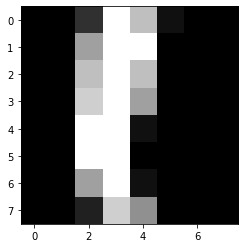

label for  3 : 1
prediction for it :  8


In [ ]:
plt.imshow(X_test_mlp[wrong].reshape(8,8))
plt.show()
print("label for ",wrong,":",y_test[wrong])
print("prediction for it : ",np.argmax(predictions[wrong]))

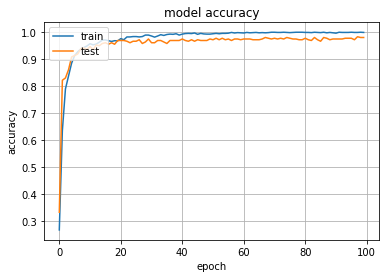

In [ ]:
from  matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

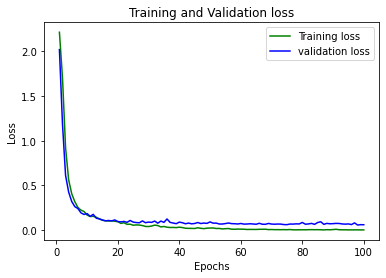

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()